# PROYECTO MODULO 1.
## TITANIC
##### En este proyecto estudiaremos un Dataset donde se muestra una seríe de datos distribuidos en filas y columnas sobre el naufragio del Titanic. Trataremos a lo largo del proyecto de hacer la labor de un Ingeniero y Analista de Datos, empezando por preparar y limpiar los datos para que posteriormente puedan ser cotejados y representados a través de diferentes gráficas.

## ÍNDICE
1. Librerias.
2. Lectura de datos.
3. Análisis Básico.
4. Limpieza de Datos
5. Análisis Específico.

    5.1. Menores.

    5.2. Diferencias por género.

    5.3. Relación entre Embarque y Clase con la Supervivencia.
    
    5.4. Pasajeros y acompañantes.

### 1.LIBRERIAS
Estas son las librerias de las que hemos hecho uso a lo largo del proyecto. 

In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import matplotlib.pyplot as plt

### 2. LECTURA.

In [2]:
df = pd.read_csv("/Users/carlosquinterobautista/Desktop/Bootcamp/Proyecto1/Titánic/titanic.csv")


In [3]:
df = pd.DataFrame(df) #Convertimos en DataFrame.
df  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3. ANÁLISI BÁSICO
Haremos uso de varias funciones que nos devolverán información relevante acerca nuestro DataFrame.

In [4]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
print("El número de filas y columnas son: ", df.shape)
print("El número de datos que encontramos en este DataFrame es: ", df.size) 

El número de filas y columnas son:  (891, 12)
El número de datos que encontramos en este DataFrame es:  10692


In [6]:
print("Las columnas que componen este DataFrame son: ", df.columns) 
print("Las filas que componen este DataFrame son: ", df.index)

Las columnas que componen este DataFrame son:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Las filas que componen este DataFrame son:  RangeIndex(start=0, stop=891, step=1)


In [7]:
df.dtypes #Tipo de datos que contienen las columnas

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.describe() #Nos da una serie de valores estadísticos predeterminados.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.head(-5) #Nos muestra las cinco primeras y últimas filas.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


### 4. LIMPIEZA DE DATOS
Una vez que hemos conocido los datos relevantes, pasamos a la limpieza de los mismo, a través de la comprobación de valores nulos y la sustitución de los mismos para acabar con dichos valores.

In [10]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum() #Muestra el número de valores nulos.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
def proporcion_nulos_por_columna(df): #Función que muestra el porcentaje de valores nulos
    total_filas = len(df)
    return df.isnull().sum() / total_filas
nulos_df = proporcion_nulos_por_columna(df)
print(nulos_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


<Axes: >

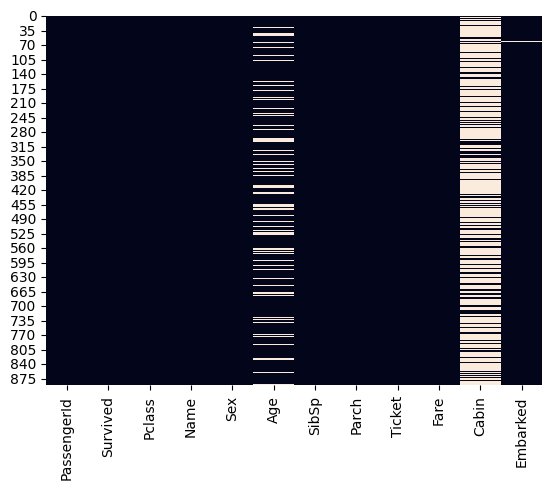

In [13]:
sns.heatmap(df.isnull()  , cbar=False) #A través de un mapa de calor podemos obsrevar la cantidad de valores nulos de 
#una manera más gráfica. 

In [14]:
#Como la columna cabin tiene más de un 75% de valores nulos, procederemos a su eliminación.
df = df.drop(["Cabin"], axis = 1)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


<Axes: >

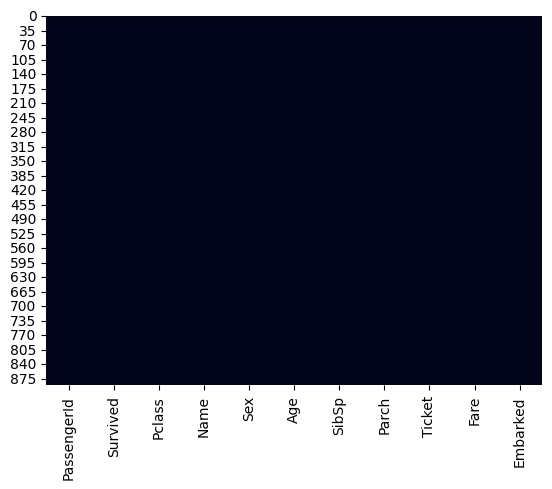

In [15]:
#En esta ocasión utilizamos esta función para corregir esos valores nulos a través de la moda y la media.
#Y lo volvemos a representar en una gráfica de mapa de calor observando que los valores nulos están corregido y
#el DataFrame listo para ser estudiado. 
def reparar_valores(df):    
    for name in df.columns:        
        if (df[name].isnull().any()): 
            if df[name].dtype == np.dtype('O'): 
                df[name].fillna(df[name].mode()[0], inplace=True)
            else:
                df[name].fillna(df[name].mean(), inplace=True)
    return df

df = reparar_valores(df)
print((df.isnull().sum()/len(df))*100)
sns.heatmap(df.isnull()  , cbar=False)

In [16]:

df["Age"] = df["Age"].astype(int) #Cambiamos la columna a valores integros, para eliminar los "0".

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


### 5. ANÁLISIS ESPECÍFICO

In [18]:
#Preguntamos por le número de supervivientes
df["Survived"].value_counts()
supervivientes= df["Survived"]
contador_muertes=0
contador_supervivientes=0
for i in supervivientes:
    if i == 0:
        contador_muertes+=1
    else:
        contador_supervivientes+=1
print("El número de muertes fue: ",contador_muertes)
print("El número de supervivientesfue: ", contador_supervivientes)
#Sacamos el también el porcentaje. 
df["Survived"].value_counts() / df["Survived"].count()*100



El número de muertes fue:  549
El número de supervivientesfue:  342


0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

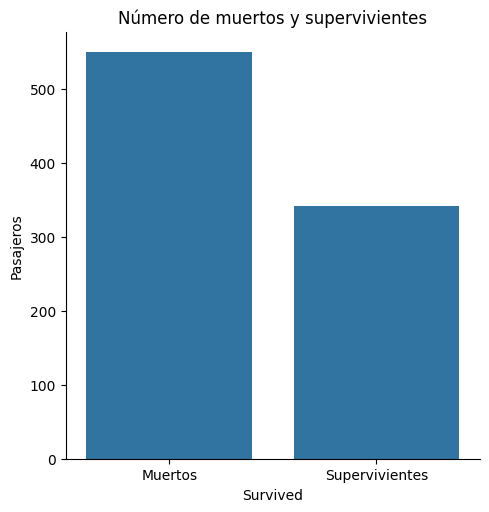

In [20]:
sns.catplot(x='Survived', data=df, kind='count')

plt.xticks([0, 1], ['Muertos', 'Supervivientes']) 

plt.ylabel('Pasajeros')

plt.title('Número de muertos y supervivientes')

plt.show()

In [21]:
Edad_media = df["Age"].mean()
print("La edad media de los pasajeros a bordo del Titanic es: ", Edad_media)

La edad media de los pasajeros a bordo del Titanic es:  29.544332210998878


Text(0.5, 1.0, 'Distribución de Edades de los Pasajeros')

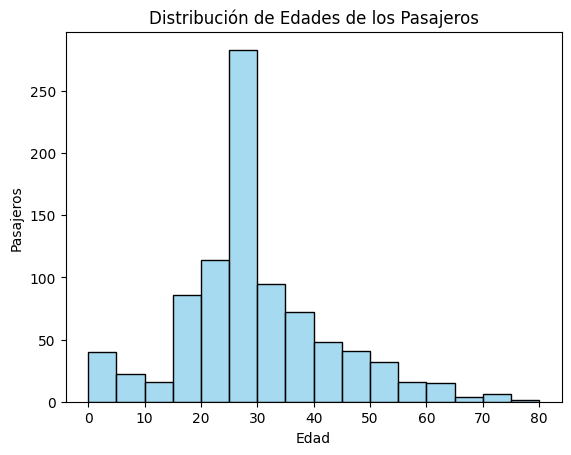

In [22]:
sns.histplot(data=df, x="Age", bins=16, color="skyblue")  
plt.xlabel("Edad")
plt.ylabel("Pasajeros")
plt.title("Distribución de Edades de los Pasajeros")

### 5.1. Menores.
##### El objetivo planteado es conocer algunos datos de aquellos pasajeros menores de edad.

In [23]:
#Sacamos los nombres y la edad de los pasajeros menores.
Menores_año = df[df["Age"]<18][["Age"]]
Menores_nombre = df[df["Age"]<18][["Name"]]
Menores = pd.concat([Menores_nombre, Menores_año], axis=1)
Menores



,Name,Age
7,"Palsson, Master. Gosta Leonard",2
9,"Nasser, Mrs. Nicholas (Adele Achem)",14
10,"Sandstrom, Miss. Marguerite Rut",4
14,"Vestrom, Miss. Hulda Amanda Adolfina",14
16,"Rice, Master. Eugene",2
...,...,...
850,"Andersson, Master. Sigvard Harald Elias",4
852,"Boulos, Miss. Nourelain",9
853,"Lines, Miss. Mary Conover",16
869,"Johnson, Master. Harold Theodor",4


In [24]:
#Creamos una columnas con valores booleanos que nos indica si el pasajero es menor o no.
df["Menores"] = df["Age"]<18

In [25]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Menores
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,False
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C,True


In [26]:
#Número total de Menores.
print("El número de menores a bordo es:", df["Menores"].sum())

El número de menores a bordo es: 113


In [27]:
#Menores muertos y supervivientes.
menores_fallecidos = df[(df["Menores"] == True) & (df["Survived"] == 0)]
print("El número de menores fallecidos fue : ",len(menores_fallecidos) )
menores_supervivientes = df[(df["Menores"] == True) & (df["Survived"] == 1)]
print("El número de menores que sobrevivieron fue: ", len(menores_supervivientes))

El número de menores fallecidos fue :  52
El número de menores que sobrevivieron fue:  61


In [28]:
px.pie(names=["Sobrevivieron", "Fallecieron"], values=[len(menores_supervivientes), len(menores_fallecidos)], title='Supervivientes y Fallecidos Menores de Edad')



#### Triste dato que nos índica que casi la mitad de los menores que iban a bordo, perecieron en las frías aguas del Atlántico Norte.

### 5.2. Diferencia por Sexo.

In [29]:
#Número de mujeres y hombres a bordo.
df["Sex"].value_counts().sort_index()


female    314
male      577
Name: Sex, dtype: int64

In [30]:
#Cambiamos de valor cateogórico a numérico de la columna "Sex"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])




In [31]:
Mujeres_supervivientes = df[(df["Survived"] == 1) & (df["Sex"] == 0)].value_counts()
Hombres_supervivientes = df[(df["Survived"] == 1) & (df["Sex"] == 1)].value_counts()
print("El número de mujeres que sobrevivieron fue: ",len(Mujeres_supervivientes) )
print("El número de hombres que sobrevivieron fue: ",len(Hombres_supervivientes))

El número de mujeres que sobrevivieron fue:  233
El número de hombres que sobrevivieron fue:  109


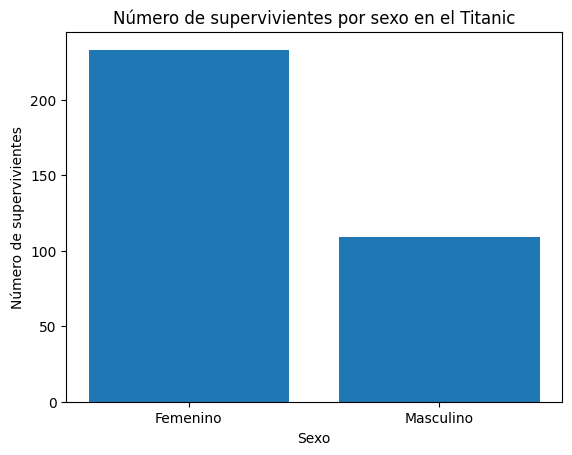

In [32]:
grouped = df.groupby("Sex")["Survived"].sum()
labels = ["Masculino" if i==1 else "Femenino" for i in grouped.index]

plt.bar(labels, grouped)

plt.xlabel("Sexo")

plt.ylabel("Número de supervivientes")

plt.title("Número de supervivientes por sexo en el Titanic")

plt.show()

In [33]:
Mujeres_fallecidas = df[(df["Survived"] == 0) & (df["Sex"] == 0)].value_counts()
Hombres_fallecidos = df[(df["Survived"] == 0) & (df["Sex"] == 1)].value_counts()
numero_mujeres = len(Mujeres_fallecidas) #Guardamos estas variables para la construcción de la gráfica. 
numero_hombres = len(Hombres_fallecidos)
print(f"El número de mujeres que perecieron fue: {numero_mujeres} ")
print(f"El número de hombres que perecieron fue: {numero_hombres}")

El número de mujeres que perecieron fue: 81 
El número de hombres que perecieron fue: 468


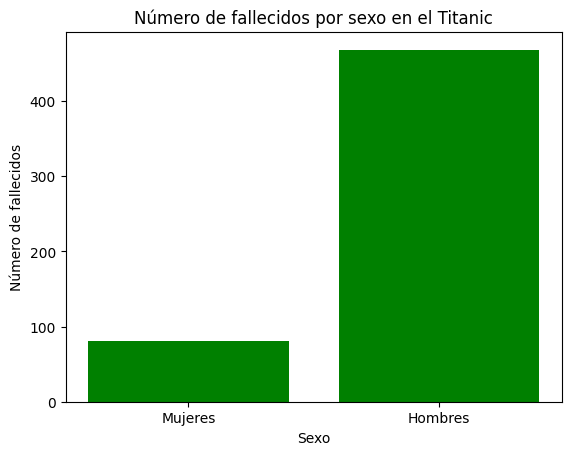

In [34]:
sexo = ["Mujeres", "Hombres"]
valores = [numero_mujeres, numero_hombres]
plt.bar(sexo, valores, color=["green"])
plt.xlabel("Sexo")
plt.ylabel("Número de fallecidos")
plt.title("Número de fallecidos por sexo en el Titanic")
plt.show()

##### En ambos gráficos se deduce claramente que existe una diferencia de género en la supervivencia. Hubo un mayor número de muejeres que sobrevivieron. Esto nos podría indicar que durante el desastre se dio prioridad en el acceso a botes salvavidas a las muejres. 

### 5.3. Embarque y clase
##### En este apartado tomaremos como referencia las columnas "Embarked" y "Pclass" y estudiaremos diferentes correlaciones con el resto de columnas.

In [35]:
#Relación entre el lugar de embarque y la supervivencia.

df.groupby("Embarked")["Survived"].value_counts()



Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

##### En esta relación podemos apreciar que la mayoría de las víctimas y supervivientes embarcaron por la puerta "S". Por lo que deducimos que  el embarque "S" fue el más transitado

Text(0.5, 1.0, 'Relación entre Supervivencia y Puerta de Embarque')

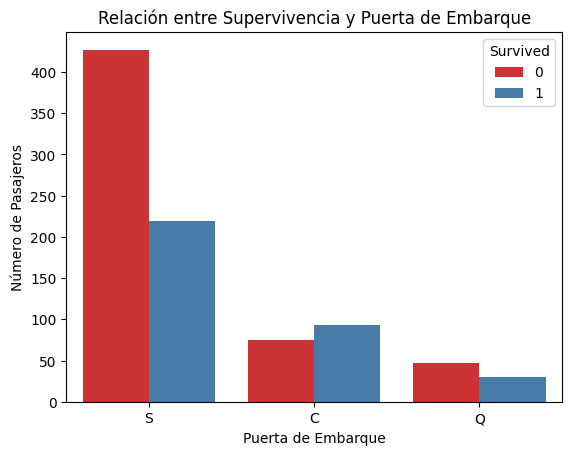

In [36]:
#Representación gráfca.
df['Survived'] = df['Survived'].astype(str)

sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.xlabel('Puerta de Embarque')
plt.ylabel('Número de Pasajeros')
plt.title("Relación entre Supervivencia y Puerta de Embarque")

##### Observando la gráfica podemos comporbar que  la mayoría de las victimas y supervivientes embarcaron por la puerta "S". Por lo que deducimos que el embarque "S" fue el más transitado. La puerta "C" muestra una tasa de supervivencia relativamene alta, mientras que la puerta "Q" muestra una tasa de supervivencia más baja que las dos anteriores. 

In [37]:
#Números de personas que muere y sobrevivie por clase
df.groupby("Pclass")["Embarked"].value_counts()


Pclass  Embarked
1       S           129
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Relación entre Supervivencia y Clase')

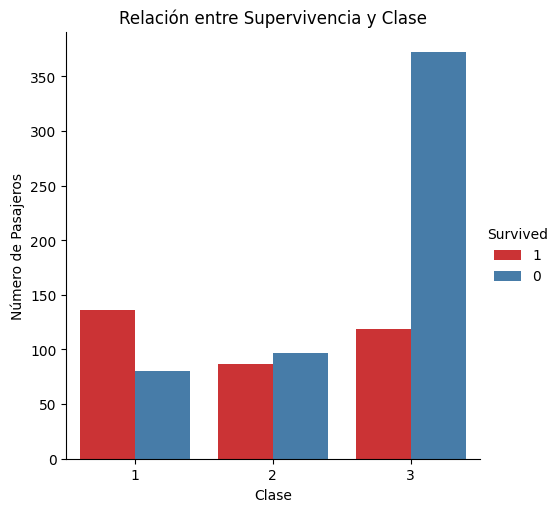

In [38]:

sns.catplot(x="Pclass",  data=df, hue="Survived", kind='count', palette='Set1')

plt.xlabel("Clase")
plt.ylabel("Número de Pasajeros")
plt.title("Relación entre Supervivencia y Clase")

##### En este caso, analizando la gráfica, observamos que las personas que viajaron en tercera clase tenían más probabilidad de morir. Por el contrario fue en la primera clase donde los indices de supervivencia fueron más alto. Añadir que el número de pasajeros que viajaban en tercera clase, era mayor que en el resto de clases, como vemos en el siguiente dato.

In [39]:
#Número de pasajeros por clase.
df["Pclass"].value_counts().sort_index() 

1    216
2    184
3    491
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Distribución de edad por clase')

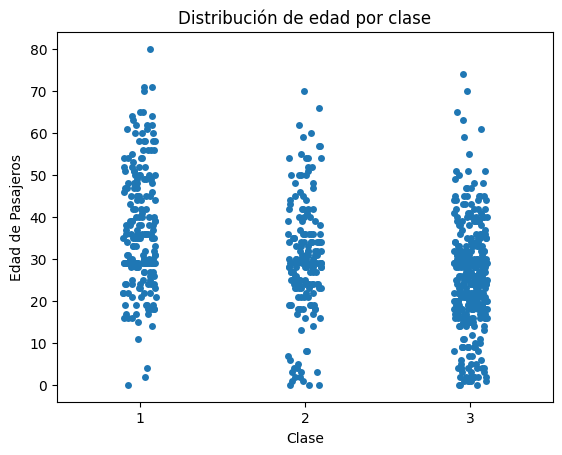

In [40]:
#Distribución de la edad por clase. 
df.groupby("Pclass")["Age"].value_counts()
#Gráfico de dispersión.
sns.stripplot(x="Pclass", y="Age", data=df,jitter=True)
plt.xlabel("Clase")
plt.ylabel("Edad de Pasajeros")
plt.title("Distribución de edad por clase")

##### Observando la distribución, deducimos varios comportamientos: en primera clase es donde se concentran aquellos pasajeros cuya edad supera los 40 años; en segunda clase la distriución es más normal; mientras que en tercera clase, es donde más se concentran los menores de edad y aquellos adultos menores de 40 años.

In [41]:
#Menores que viajaban en cada clase
df.groupby("Pclass")["Menores"].sum()

Pclass
1    12
2    23
3    78
Name: Menores, dtype: int64

In [42]:
#Precio medio por clase.
df.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Precios por cada clase')

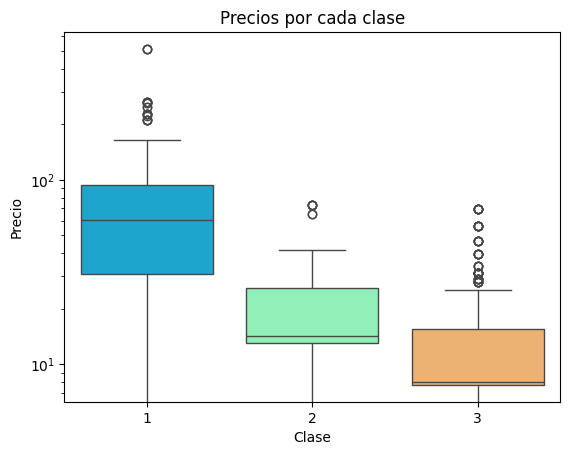

In [43]:
sns.boxplot(x="Pclass", y="Fare", data=df,palette='rainbow')
plt.yscale("log") #Aplicamos la escala logarítmica para que se vean mejor en la gráfica. 
plt.xlabel("Clase")
plt.ylabel("Precio")
plt.title("Precios por cada clase")

##### En este gráfico de caja se nos muestra la distribución de las tarifas en cada clase. Cada caja representa una clase y en cada una de ellas viene reflejada la media(línea en el centro de la caja), los cuartiles(parte superior e inferior) y los valores atípicos. 

### 5.4. Pasajeros y Acompañantes.

In [44]:
#Creamos una columna que contenga los miembros de la familia que se encuentran a bordo sin contar con el
#propio pasajero. 
df["Members_family"] = df["SibSp"] + df["Parch"]
df["Members_family"].value_counts(). sort_index()
#Observamos que la mayor parte de los pasajeros viajaban solos, con uno o dos acompañantes.


0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Members_family, dtype: int64

In [45]:
df.groupby("Members_family")["Survived"].value_counts().sort_index()

Members_family  Survived
0               0           374
                1           163
1               0            72
                1            89
2               0            43
                1            59
3               0             8
                1            21
4               0            12
                1             3
5               0            19
                1             3
6               0             8
                1             4
7               0             6
10              0             7
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Relación entre número de acompañante e indice de supervivencia')

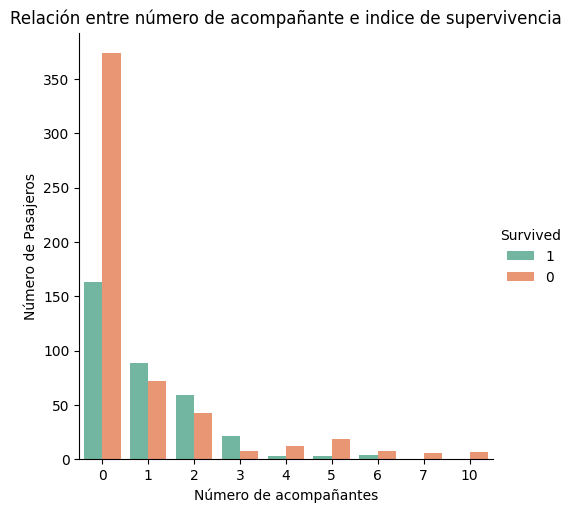

In [46]:
sns.catplot(x="Members_family",  data=df, hue='Survived', kind='count', palette='Set2')

plt.xlabel("Número de acompañantes")
plt.ylabel("Número de Pasajeros")
plt.title("Relación entre número de acompañante e indice de supervivencia")

##### Analizando la gráfica, llegamos a la conclusión de que, efectivamente, la mayoría de pasajeros viajaban solos. Y no solo eso, fue la categoría que mayor indice de supervivencia tuvo. En conclusión, los pasajeros que viajaban solos o con un pequeño número de acompañantes tenían mayor posibilidad de sobrevivir. 